In [5]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM

In [23]:
template = """
Question: {question}

Answer: Let's think step by step. Please answer in Korean.
""".strip()

In [24]:
prompt = ChatPromptTemplate.from_template(template)
prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template="Question: {question}\n\nAnswer: Let's think step by step. Please answer in Korean."), additional_kwargs={})])

In [25]:
model = OllamaLLM(model="llama4:scout")

In [26]:
chain = prompt | model

In [29]:
res = chain.invoke({"question": "Langchain이 뭐야?"})

In [30]:
print(res)

Langchain은 최근에 등장한 인공지능 기술과 관련된 용어인 것 같습니다. 

Langchain은 언어 모델을 기반으로 하는 애플리케이션 개발을 위한 프레임워크 또는 라이브러리라고 할 수 있습니다. 

보다 구체적으로 말하면 Langchain은 자연어 처리(NLP) 및 생성 모델을 활용하여 텍스트 기반 애플리케이션을 구축할 수 있는 도구입니다.

이를 통해 개발자들은 언어 모델을 쉽게 통합하고, 복잡한 텍스트 관련 작업을 보다 효율적으로 수행할 수 있습니다.

 Langchain에 대해 더 자세한 정보가 필요하거나, 관련 질문이 있으신가요?


---

In [31]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image

In [38]:
def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """
    # RGBA를 RGB로 변환
    if pil_image.mode == 'RGBA':
        pil_image = pil_image.convert('RGB')

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

In [33]:
def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))

In [50]:
file_path = "/home/themiraclesoft/gpu_test/test2.png"

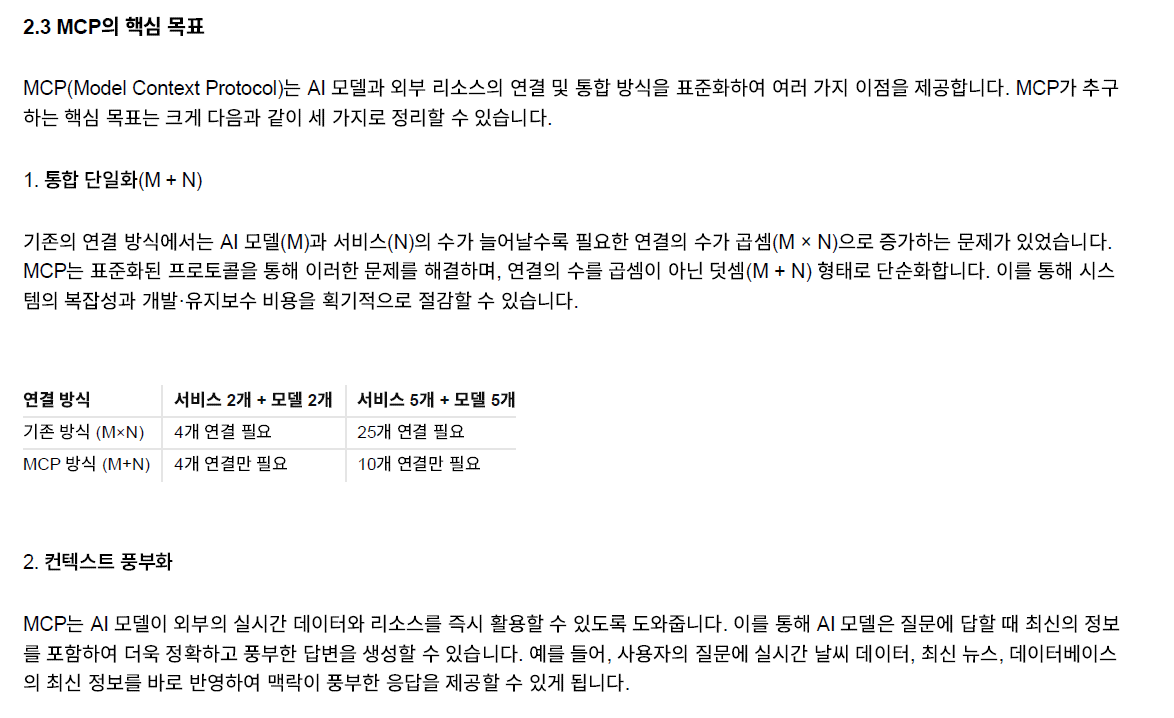

In [51]:
pil_image = Image.open(file_path)
pil_image

In [52]:
image_b64 = convert_to_base64(pil_image)


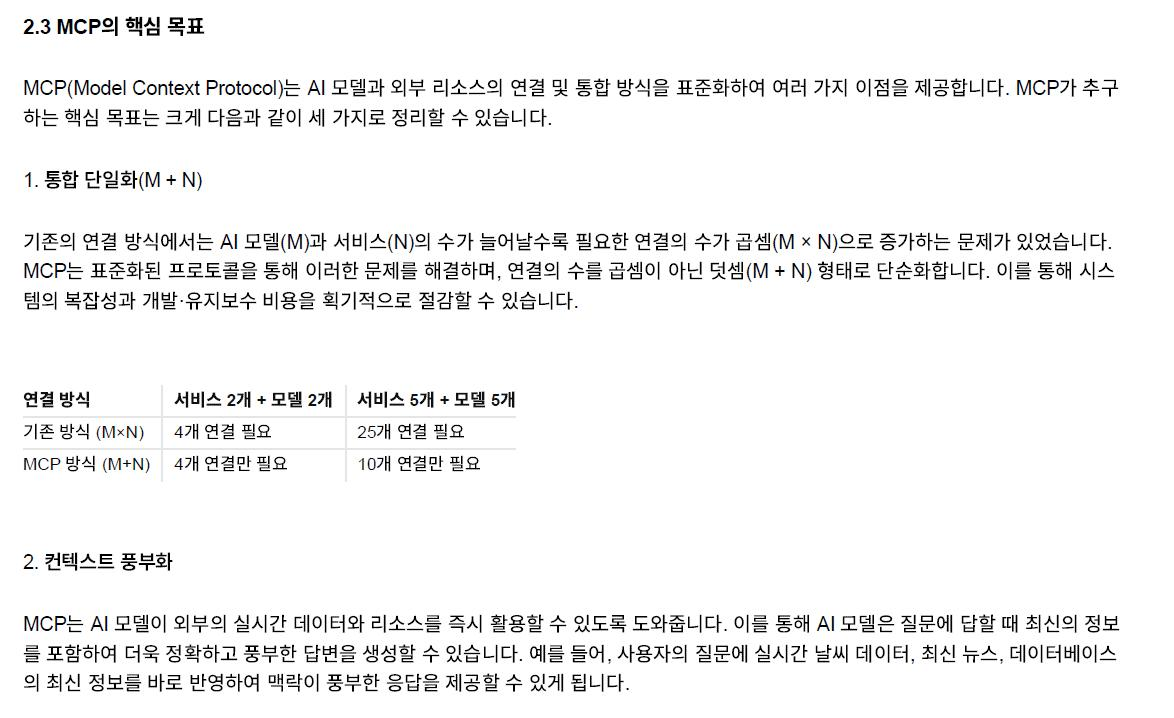

In [53]:
plt_img_base64(image_b64)

In [54]:
llm_with_image_context = model.bind(images=[image_b64])
llm_with_image_context

RunnableBinding(bound=OllamaLLM(model='llama4:scout'), kwargs={'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCALOBJYDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK

In [57]:
res = llm_with_image_context.invoke("이 내용이 의미하는게 뭐야?")
# test: 25.1s
# test1: 5.9s

In [58]:
print(res)

이 내용은 MCP(Model Context Protocol)에 대해 설명하고 있습니다. MCP는 AI 모델과 외부 리소스의 통합을 표준화하여 효율성을 극대화하는 프로토콜입니다. 주로 두 가지 핵심 목표를 가지고 있습니다.

1. **통합 단순화**: 기존에는 AI 모델과 서비스가 각각 연결될 때마다 복잡한 연결 방식이 필요했습니다. 예를 들어, 서비스 2개와 모델 2개를 연결할 때 4개의 연결이 필요했지만, MCP를 사용하면 2개의 연결만으로 충분합니다. 이는 연결의 수가 서비스와 모델의 수에 비례하지 않고, 효율적으로 관리될 수 있음을 의미합니다.

2. **컨텍스트 풍부화**: MCP는 실시간 데이터와 외부 자원을 활용하여 AI 모델의 답변을 풍부하게 만드는 것을 목표로 합니다. 예를 들어, 사용자의 질문에 실시간 날씨 데이터나 최신 뉴스, 데이터베이스 정보 등을 반영하여 더욱 정확하고 풍부한 답변을 제공할 수 있습니다.

이러한 방식으로 MCP는 복잡한 연결 문제를 단순화하고, AI 모델의 성능을 향상시키는 것을 목표로 합니다. 이를 통해 시스템의 효율성을 극대화하고, 사용자에게 더욱 풍부한 정보와 경험을 제공할 수 있습니다.
